In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.preprocessing import LabelEncoder

<h1 style="color:blue">Exploratory Data Analysis (EDA)</h1>

In [2]:
# Load the dataset
data = pd.read_csv('Data/heart_attack_prediction_dataset.csv')

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [5]:
data.shape

(8763, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

<h3 style="color:blue">Dropping the Patient ID</h3>

In [8]:
data = data.drop('Patient ID', axis=1)
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


<h3 style="color:blue">Separating the BP into Systolic and Diastolic</h3>

In [9]:
data['BP_systolic'] = data['Blood Pressure'].apply(lambda x: x.split("/")[0])
data['BP_diastolic'] = data['Blood Pressure'].apply(lambda x: x.split("/")[1])
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,Male,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


<h3 style="color:blue">Replacing the blood pressure column by Commenting and Re-arranging the Systolic and Diastolic columns</h3>

In [10]:
data = data[['Age', 'Sex', 'Cholesterol', 
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
data.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [11]:
#data types of systolic and diastolic blood pressure is object. change it to int
data['BP_systolic'] = pd.to_numeric(data['BP_systolic'])
data['BP_diastolic'] = pd.to_numeric(data['BP_diastolic'])
data.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

<h1 style="color:blue"> Visualizations</h1>

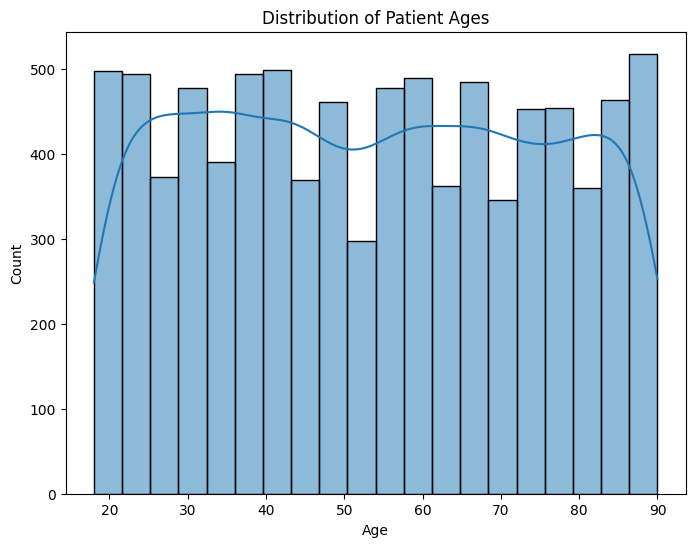

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
x = data.groupby('Heart Attack Risk').count().index
x

Index([0, 1], dtype='int64', name='Heart Attack Risk')

In [14]:
y = data.groupby('Heart Attack Risk')['Age'].count()
y

Heart Attack Risk
0    5624
1    3139
Name: Age, dtype: int64

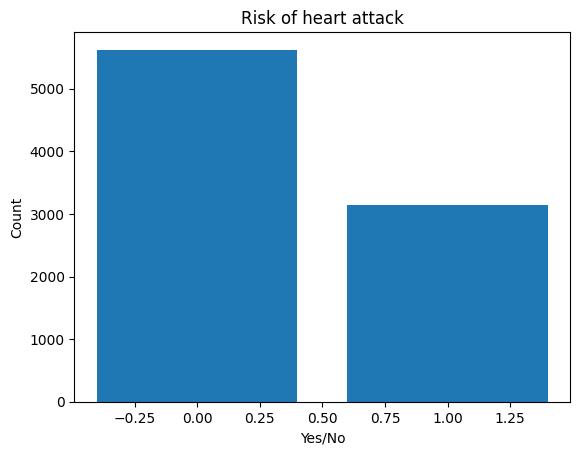

In [15]:
plt.bar(x, y)
plt.title('Risk of heart attack')
plt.xlabel('Yes/No')
plt.ylabel('Count')
plt.show()

In [16]:
print("Finding the features which are most relevant to Heart Attack Risk")
numeric_vals = data.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr

Finding the features which are most relevant to Heart Attack Risk


,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,0.003070,-0.009826,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,...,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000133,0.002083,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,...,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
BP_systolic,0.003070,0.000133,1.000000,0.013337,0.008482,-0.005306,-0.009762,-0.009534,-0.001918,0.010764,...,-0.011926,-0.001182,0.017848,0.003393,0.010414,0.004279,0.005121,-0.007574,-0.004628,0.018585
BP_diastolic,-0.009826,0.002083,0.013337,1.000000,-0.018113,-0.000512,0.017818,-0.012293,-0.020574,-0.007282,...,0.008813,0.004607,-0.008445,-0.006606,0.008816,0.000806,0.000545,0.016294,0.010679,-0.007509
Heart Rate,-0.003844,0.000315,0.008482,-0.018113,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,...,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,-0.005306,-0.000512,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,...,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.009762,0.017818,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,...,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.009534,-0.012293,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,...,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,-0.001918,-0.020574,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,...,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.010764,-0.007282,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,...,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778


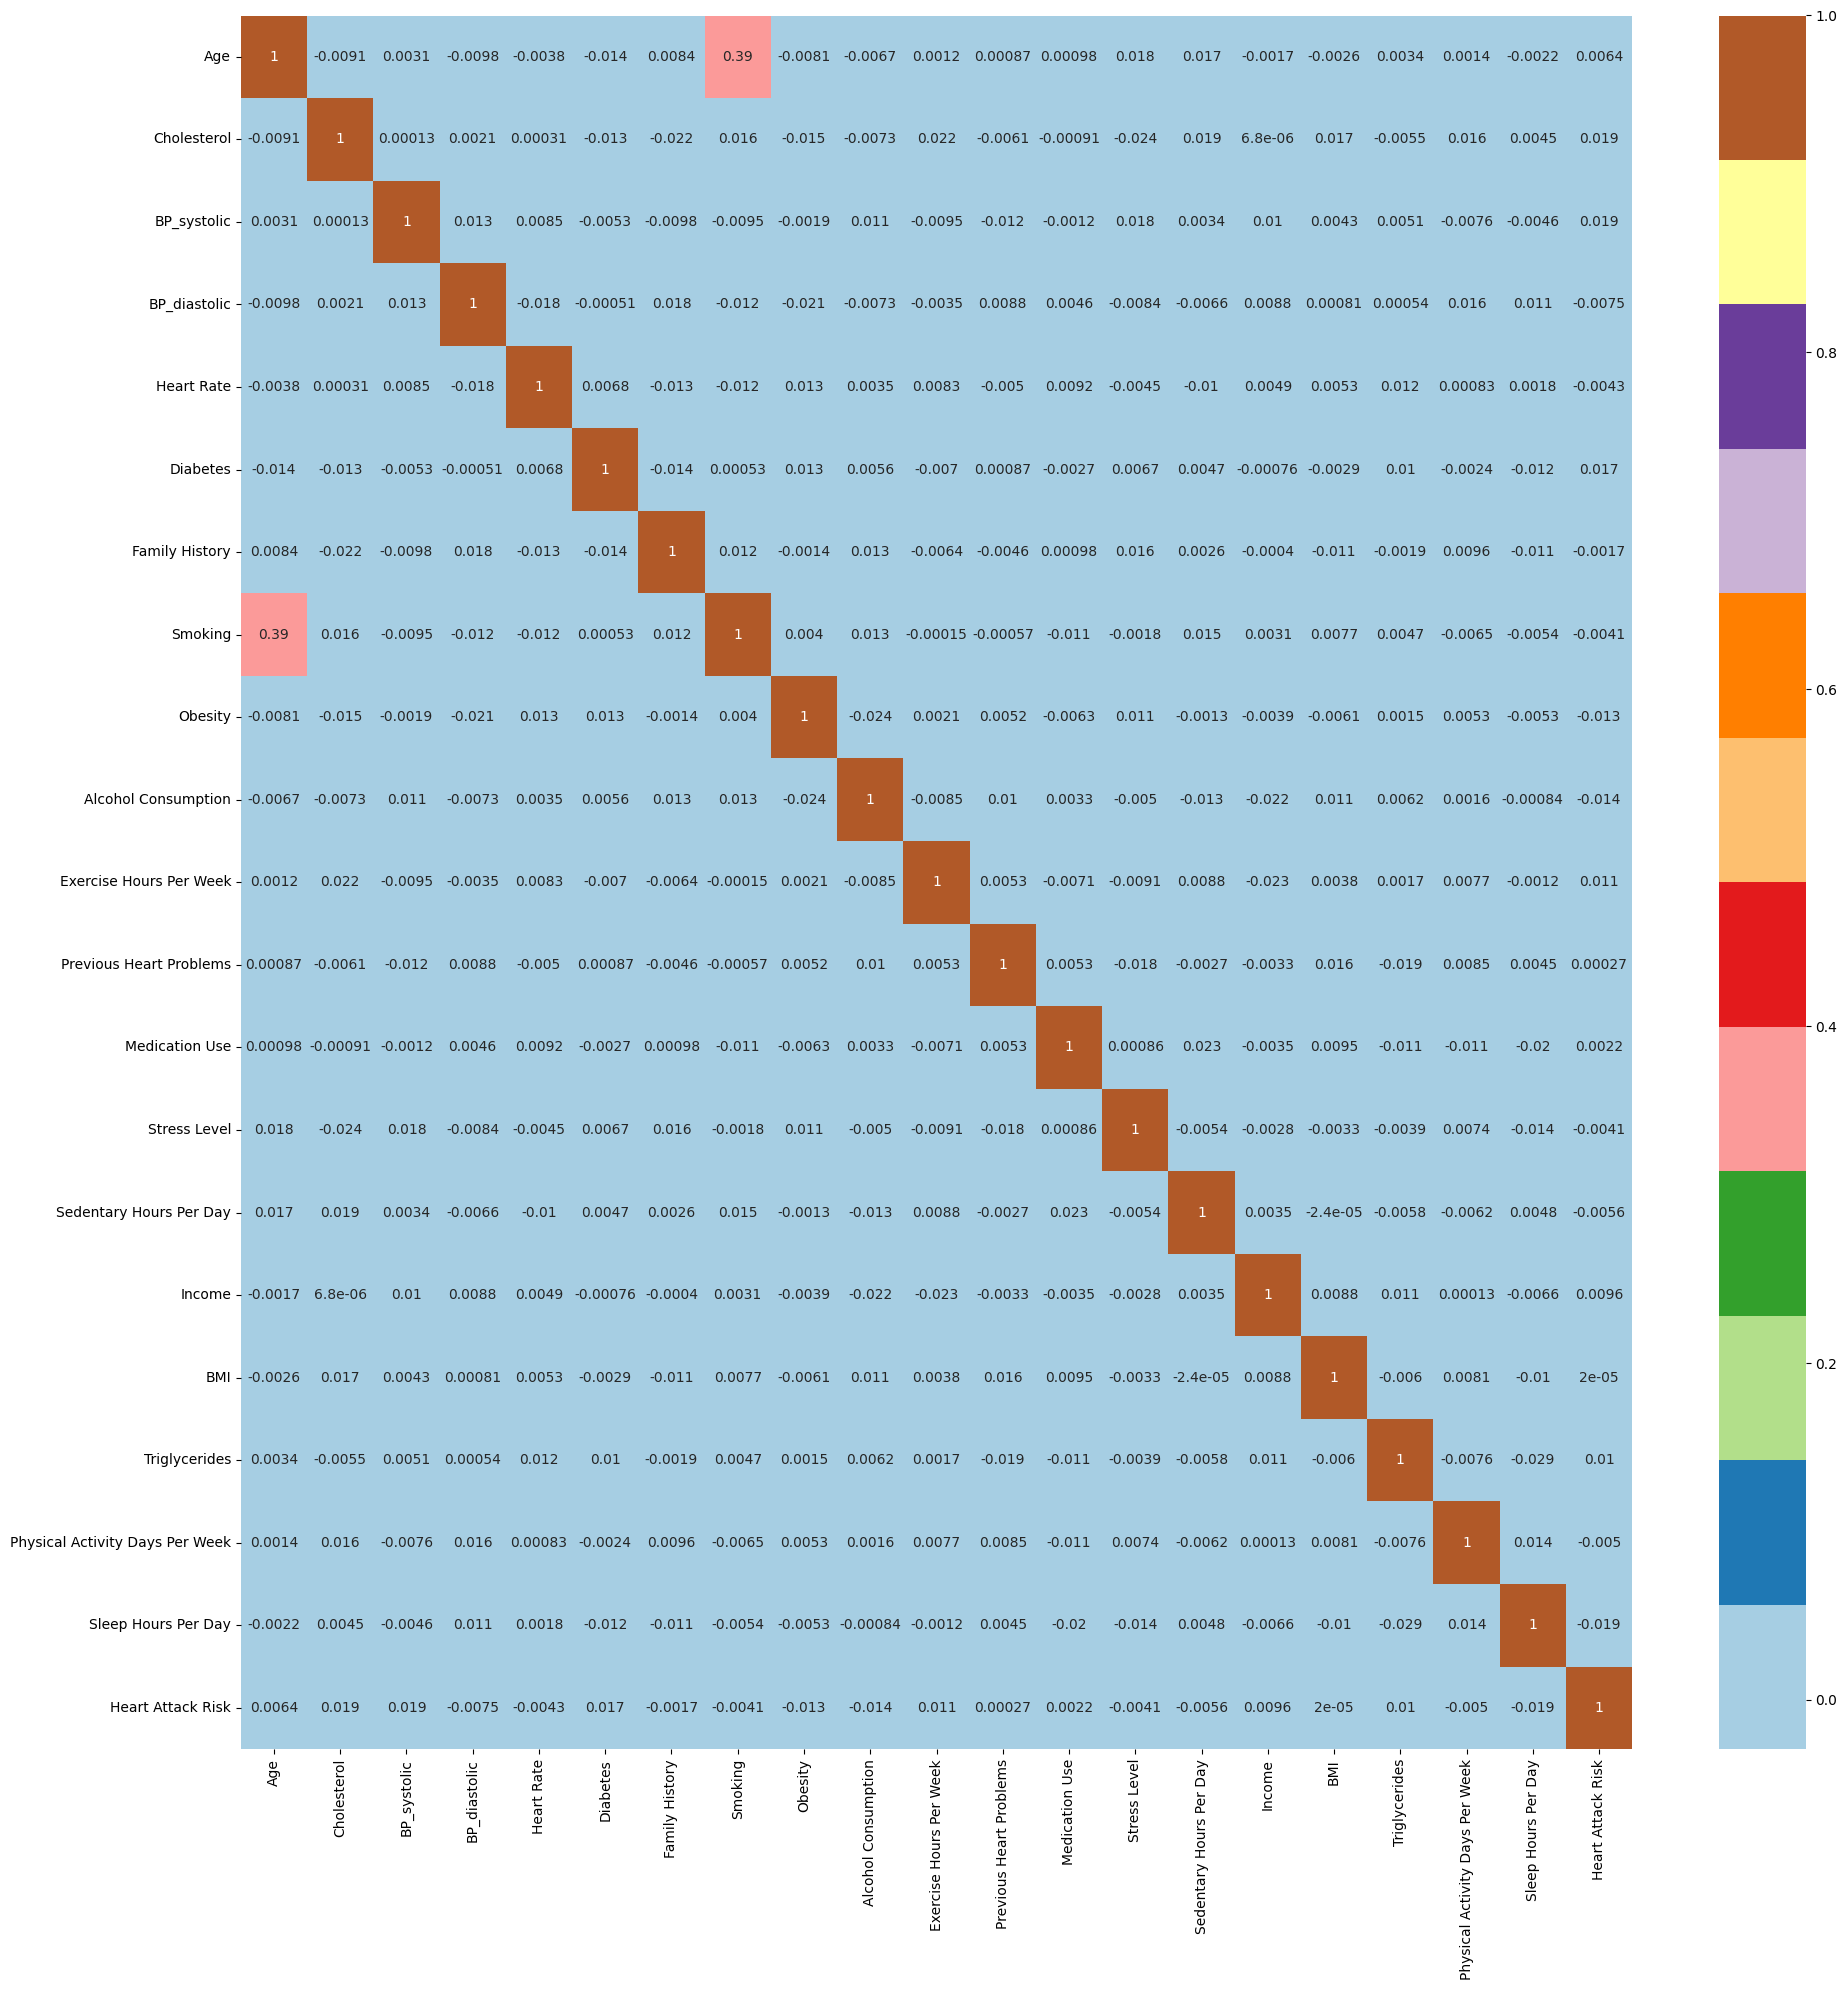

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='Paired')
plt.tight_layout()
plt.show()

In [18]:
# Copied the first dataframe
dataset2 = data.copy()
dataset2.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [19]:
dataset2.drop(['Income', 'Sedentary Hours Per Day', 'Stress Level', 'Physical Activity Days Per Week'], axis=1, inplace=True)

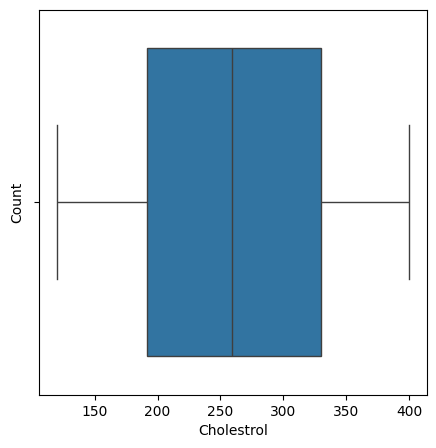

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, x='Cholesterol')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

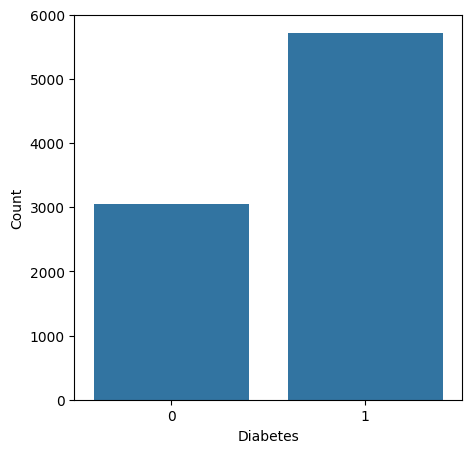

In [21]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

<h1 style="color:blue">Model Preparation</h1>

In [22]:
#Sex and Diet are in object so we have to classify them into labels
data3 = dataset2.select_dtypes(include=['object'])
le = LabelEncoder()
label_encoder = {}
for column in data3:
    label_encoder[column] = le
    data3[column] = label_encoder[column].fit_transform(dataset2[column])
data3.head()

,Sex,Diet,Country,Continent,Hemisphere
0,1,0,0,5,1
1,1,2,3,4,0
2,0,1,6,3,0
3,1,0,3,4,0
4,1,2,16,1,0


In [23]:
data4 = pd.read_csv("Data/heart_attack_prediction_dataset.csv")
data4.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [24]:
data4 = data4[['Sex', 'Diet']]
data4.head()

,Sex,Diet
0,Male,Average
1,Male,Unhealthy
2,Female,Healthy
3,Male,Average
4,Male,Unhealthy


In [25]:
result = pd.concat([data4, data3], axis=1)
result.head()

,Sex,Diet,Sex,Diet,Country,Continent,Hemisphere
0,Male,Average,1,0,0,5,1
1,Male,Unhealthy,1,2,3,4,0
2,Female,Healthy,0,1,6,3,0
3,Male,Average,1,0,3,4,0
4,Male,Unhealthy,1,2,16,1,0


In [26]:
dataset2 = dataset2.drop(['Sex', 'Diet', ], axis=1)

In [27]:
dataset2 = pd.concat([dataset2, data3], axis=1)
dataset2.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sex,Diet,Country,Continent,Hemisphere
0,67,208,158,88,72,0,0,1,0,0,...,6,Argentina,South America,Southern Hemisphere,0,1,0,0,5,1
1,21,389,165,93,98,1,1,1,1,1,...,7,Canada,North America,Northern Hemisphere,0,1,2,3,4,0
2,21,324,174,99,72,1,0,0,0,0,...,4,France,Europe,Northern Hemisphere,0,0,1,6,3,0
3,84,383,163,100,73,1,1,1,0,1,...,4,Canada,North America,Northern Hemisphere,0,1,0,3,4,0
4,66,318,91,88,93,1,1,1,1,0,...,5,Thailand,Asia,Northern Hemisphere,0,1,2,16,1,0


<h1 style="color:blue">Modelling</h1>

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

<h2 style="color:blue">Feature Selection</h2>

In [29]:
X = dataset2[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Sleep Hours Per Day',
       'Sex', 'Diet']]
y = dataset2[['Heart Attack Risk']]

<h2 style="color:blue">i. Rescaling the values</h2>

In [30]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [32]:
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [33]:
X_scaled

array([[ 0.64160649, -0.6477889 ,  0.88256006, ..., -0.47481413,
         0.73081948, -1.17133477],
       [-1.55373089,  1.59785782,  1.15174695, ...,  0.04531728,
         0.73081948,  1.35337032],
       [-1.55373089,  0.7914101 ,  1.49784438, ..., -1.51507696,
        -1.36832697,  0.09101777],
       ...,
       [-0.79013528,  1.3124994 , -0.84792707, ..., -0.99494555,
         0.73081948, -1.17133477],
       [ 0.25980869, -1.19369197, -0.3095533 , ...,  0.5654487 ,
         0.73081948,  0.09101777],
       [ 0.92795485, -0.16392027,  0.42109683, ...,  0.04531728,
         0.73081948,  0.09101777]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split \
(X_scaled, y_resample, test_size=0.33, random_state=42)

In [35]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [36]:
models = [
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['Support Vector Machines', SVC()],
    ['RandomForestClassifier', RandomForestClassifier \
     (random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')],
    ['GradientBoostingClassifier', GradientBoostingClassifier()],
    ['AdaBoostClassifier', AdaBoostClassifier()],
    ['ExtraTreesClassifier', ExtraTreesClassifier()],
    ['K-Nearest Neighbors', KNeighborsClassifier()],
    ['XGBClassifier', XGBClassifier()]

]

In [37]:
resultsacc1 = []
resultsacc2 = []

In [38]:
for model in models:
    name = model[0]
    mod = model[1]
    
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)
    
    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = mod.score(X_train, y_train)
    acctes = mod.score(X_test, y_test)
    
    resultsacc1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})
    
results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

C:\Users\kevzm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [39]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.339170,1.000000,0.660830
5,ExtraTreesClassifier,0.357220,1.000000,0.642780
7,XGBClassifier,0.364224,0.979299,0.635776
1,Support Vector Machines,0.367996,0.726247,0.632004
4,AdaBoostClassifier,0.370959,0.642251,0.629041
3,GradientBoostingClassifier,0.373384,0.692012,0.626616
6,K-Nearest Neighbors,0.397091,0.750531,0.602909
0,DecisionTreeClassifier,0.433998,1.000000,0.566002


In [40]:
results2_df

,Model,MeanSqauredError,RootMeanSquareError,MeanAbsoluteError
0,DecisionTreeClassifier,0.433998,0.658785,0.433998
1,Support Vector Machines,0.367996,0.606626,0.367996
2,RandomForestClassifier,0.339170,0.582383,0.339170
3,GradientBoostingClassifier,0.373384,0.611051,0.373384
4,AdaBoostClassifier,0.370959,0.609064,0.370959
5,ExtraTreesClassifier,0.357220,0.597679,0.357220
6,K-Nearest Neighbors,0.397091,0.630151,0.397091
7,XGBClassifier,0.364224,0.603510,0.364224


<h2 style="color:blue">ii. Models' Classification Report</h2>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve

best_model = None
best_accuracy = 0

for key in models:
    name = key[0]
    mod = key[1]
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    
    print('Classification Report:', name)
    print(classification_report(y_test, predictions))
    
    print('Accuracy Score:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('AUC Score:', auc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f'The best performing model is: {best_model} with accuracy {best_accuracy}')


Classification Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1857
           1       0.56      0.57      0.57      1855

    accuracy                           0.56      3712
   macro avg       0.56      0.56      0.56      3712
weighted avg       0.56      0.56      0.56      3712

Accuracy Score: 0.564385775862069
Precision: 0.5631634819532909
Recall: 0.5719676549865229
AUC Score: 0.5643898587264332
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1857
           1       0.66      0.54      0.60      1855

    accuracy                           0.63      3712
   macro avg       0.64      0.63      0.63      3712
weighted avg       0.64      0.63      0.63      3712

Accuracy Score: 0.6320043103448276
Precision: 0.6596995427824951
Recall: 0.5444743935309974
AUC Score: 0.6319571752253802


In [ ]:
model = RandomForestClassifier \
(random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [ ]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []
    if predict_type > 0:
        if 'Smoking' in new_person and new_person['Smoking'] == 1:
            lifestyle_changes.append('quit smoking')
        if 'BMI' in new_person and new_person['BMI'] < 18.5:
            lifestyle_changes.append('gain weight')
        elif 'BMI' in new_person and new_person['BMI'] > 25:
            lifestyle_changes.append('lose weight')
        if 'Exercise Hours Per Week' in new_person and new_person['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('do more exercise')
        if 'Diet' in new_person and new_person['Diet'] == 0:
            lifestyle_changes.append('eat healthy food')
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('try reducing alcohol')
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Please {i},")
        print("This can reduce your heart rate risk.")
        
    if predict_type > 0.75:
        print("You should consult a doctor immediately.")
        print("Heart attack risk:", predict_type)

In [ ]:
new_person = {'Age': 21, 'Cholesterol': 324, 'BP_systolic': 174, 'BP_diastolic': 99, 'Heart Rate': 72,
       'Diabetes': 1, 'Family History': 0, 'Smoking': 1, 'Obesity': 1,
       'Alcohol Consumption':0, 'Exercise Hours Per Week': 2.07,
       'Previous Heart Problems':1, 'Medication Use':1,
        'BMI': 28.17, 'Triglycerides': 587
       , 'Sleep Hours Per Day' : 4,
       'Sex': 0, 'Diet': 1}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

In [ ]:
model.predict(x)

In [ ]:
predict_type = model.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

In [ ]:
import pickle as pkl
with open("model.pkl", 'wb') as f:
    pkl.dump(model, f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))